## CS4650 Capstone Project Introduction
For our capstone project, we analyzed data on crime statistics throughout the United States from 2001 to 2016. The data was collected in an effort of the National Prisoners Statistics Program which requires the Bureau of Justice Statistics. They are collected annually from each of the fifty states, with some voluntarily given or estimated (indicated by the field *crime_estimated*). It has population data like the total state population and prisoner count. It also has two different types of crime that were recorded: violent and property. Data that were collected for violent crimes include murder, rape, robbery, and aggressive assault. Data that were collected for property crimes include burglary, larceny, and vehicle theft.


The dataset already has features that can be used for analysis but needs some cleaning. Each column was already labeled for the respective field and the values have the appropriate data form. Important to note is that data was split into four different data frames for preparation: violent crime data, property crime data, population data, and fedral prison population data. In the crime and population data, some rows have no statistics for certain fields and thus, were removed. Also, these datasets have federal statistics which are removed since they do not contain data on speicifc crimes like murder. Additionally, the *rape_revised* field from the violent crime data frame was removed because it contained no data for any of the states.


We split the responsibility for the four recommended data analyses between each of us. Bryce Lam has done Mapping and Reducing. Zubair Ali has done Linear Regression and Logistic Regression.Evan Cheng has done Clustering.


Kaggle Dataset: https://www.kaggle.com/datasets/christophercorrea/prisoners-and-crime-in-united-states/data

GitHub CSV Files: https://github.com/evanwc/Kaggle-Crime-and-Incarceration-Dataset/tree/main

## Reading Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Use pandas to read crime and incarceration from github repo
crime_df = pd.read_csv('https://raw.githubusercontent.com/evanwc/Kaggle-Crime-and-Incarceration-Dataset/main/crime_and_incarceration_by_state.csv')
crime_df.drop("rape_revised", axis = 1, inplace = True)
crime_df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0


In [ ]:
# DataFrame with violent crimes
violent_crime_df = crime_df[["jurisdiction", "year", "violent_crime_total", "murder_manslaughter",
                             "rape_legacy", "robbery", "agg_assault"]]
violent_crime_df = violent_crime_df.dropna()
violent_crime_df.head()

,jurisdiction,year,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault
1,ALABAMA,2001,19582.0,379.0,1369.0,5584.0,12250.0
2,ALASKA,2001,3735.0,39.0,501.0,514.0,2681.0
3,ARIZONA,2001,28675.0,400.0,1518.0,8868.0,17889.0
4,ARKANSAS,2001,12190.0,148.0,892.0,2181.0,8969.0
5,CALIFORNIA,2001,212867.0,2206.0,9960.0,64614.0,136087.0


In [ ]:
# DataFrame with property crimes
property_crime_df = crime_df[["jurisdiction", "year", "property_crime_total",
                              "burglary", "larceny", "vehicle_theft"]]
property_crime_df = property_crime_df.dropna()
property_crime_df.head()

,jurisdiction,year,property_crime_total,burglary,larceny,vehicle_theft
1,ALABAMA,2001,173253.0,40642.0,119992.0,12619.0
2,ALASKA,2001,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,2001,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,2001,99106.0,22196.0,69590.0,7320.0
5,CALIFORNIA,2001,1134189.0,232273.0,697739.0,204177.0


In [ ]:
# DataFrame with prison population and metadata
prisoner_population_df = crime_df[["jurisdiction", "year", "includes_jails", "prisoner_count",
                              "crime_reporting_change", "crimes_estimated", "state_population"]]
clean_prisoner_population_df = prisoner_population_df.dropna()
clean_prisoner_population_df.head()

,jurisdiction,year,includes_jails,prisoner_count,crime_reporting_change,crimes_estimated,state_population
1,ALABAMA,2001,False,24741,False,False,4468912.0
2,ALASKA,2001,True,4570,False,False,633630.0
3,ARIZONA,2001,False,27710,False,False,5306966.0
4,ARKANSAS,2001,False,11489,False,False,2694698.0
5,CALIFORNIA,2001,False,157142,False,False,34600463.0


In [ ]:
# DataFrame with federal prison population
fed_prisoner_population_df = prisoner_population_df[["jurisdiction", "year", "prisoner_count"]]
fed_prisoner_population_df = fed_prisoner_population_df[prisoner_population_df["jurisdiction"] == "FEDERAL"]
fed_prisoner_population_df.head()

,jurisdiction,year,prisoner_count
0,FEDERAL,2001,149852
51,FEDERAL,2002,158216
102,FEDERAL,2003,168144
153,FEDERAL,2004,177600
204,FEDERAL,2005,186364


## Map/Reduce

In [ ]:
!pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
# create text file for the data frames of violent crimes, property crimes, and prisoner population
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
violent_crime_df.to_csv(r'/content/violent_crime.txt',
                header = None,
                index = None,
                sep = ';',
                mode = 'w')

property_crime_df.to_csv(r'/content/property_crime.txt',
                header = None,
                index = None,
                sep = ';',
                mode = 'w')

clean_prisoner_population_df.to_csv(r'/content/prisoner_population.txt',
                header = None,
                index = None,
                sep = ';',
                mode = 'w')

fed_prisoner_population_df.to_csv(r'/content/fed_prisoner_population.txt',
                header = None,
                index = None,
                sep = ';',
                mode = 'w')

It is necessary for all values from each of the three different data frames to be written into the respective text file. This is so the MRJob module can be used. The pandas method *to_csv* writes a dataframe's value to a desired text file in a certain directory. The delimiter is a semi-colon and is used to indicate where to split in the mapper method.

In [ ]:
# Find the year with most violent crimes recorded
# and the percentage of each type of crime
%%file violent_crimes.py

from mrjob.job import MRJob

class ViolentCrimes(MRJob):
  def mapper(self, _, line):
    val = line.strip().split(';')
    # get state name, year, total violent crimes for that year, types of violent crime
    state, year, crime_total = (val[0], val[1], val[2])
    murder, rape, robbery, assault = (val[3], val[4], val[5], val[6])
    yield state, {"year": int(year),
                   "crimes_total": float(crime_total),
                   "crimes_amount": [float(murder), float(rape), float(robbery), float(assault)]
                 }

  def reducer(self, key, values):
    highest_count = year_w_count = 0
    percentage = [0]*5
    for dict in values:
      # year with most crimes
      if dict["crimes_total"] > highest_count:
        highest_count = dict["crimes_total"]
        year_w_count = dict["year"]
        # calculate crime type percents
        for i in range(0, len(dict["crimes_amount"]), 1):
          percentage[i] = '{0:.2%}'.format( dict["crimes_amount"][i]/dict["crimes_total"] );

    yield key, {"Most Violent Crimes Recorded": highest_count, "Year": year_w_count,
                "Murder":percentage[0], "Rape":percentage[1],
                "Robbery":percentage[2], "Assault":percentage[3]}

if __name__ == '__main__':
  ViolentCrimes.run()

Overwriting violent_crimes.py


The first mapper/reducer program finds the year with the most amount of violent crimes recorded for each state. It will also print the percentage of different crimes from said total crimes.

The mapper gets every value from the violent crime dataframe by splitting by their semicolon delimiter. Then, only certain fields’ values were initialized to variables: *jurisdiction*, *year*, *violent_crime_total*, *murder*, *rape*, *robbery*, and *assault*. Finally, it passes a key with the values to the reducer. Also, the records of different types of violent crime are put into an array.

The reducer iterates each set of values of a key. One feature is that it will find what is the highest amount of recorded crimes. It will initialize that record and the associated year to the corresponding variables. Another feature is that it calculates the percentage of each type of crime out of the total recorded. Using a loop, iterate and divide each value of the passed array and format to percent. After finishing its computation, it will show them for display as output.

Just from observing percentages from the output, the most common type of violent crime is assault. The least common crime is murder.


In [ ]:
!python violent_crimes.py violent_crime.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/violent_crimes.root.20240514.204121.332943
Running step 1 of 1...
job output is in /tmp/violent_crimes.root.20240514.204121.332943/output
Streaming final output from /tmp/violent_crimes.root.20240514.204121.332943/output...
"ALABAMA"	{"Most Violent Crimes Recorded": 22952.0, "Year": 2015, "Murder": "1.52%", "Rape": "6.34%", "Robbery": "20.09%", "Assault": "69.51%"}
"ALASKA"	{"Most Violent Crimes Recorded": 5392.0, "Year": 2015, "Murder": "1.09%", "Rape": "12.05%", "Robbery": "14.11%", "Assault": "68.08%"}
"ARIZONA"	{"Most Violent Crimes Recorded": 33456.0, "Year": 2006, "Murder": "1.59%", "Rape": "7.32%", "Robbery": "28.37%", "Assault": "62.72%"}
"ARKANSAS"	{"Most Violent Crimes Recorded": 15538.0, "Year": 2006, "Murder": "1.32%", "Rape": "8.53%", "Robbery": "17.69%", "Assault": "72.46%"}
"CALIFORNIA"	{"Most Violent Crimes Recorded": 212867.0, "Year": 2001, "Murder":

In [ ]:
# Find the year with most property crimes recorded
# and the percentage of each type of crime
%%file property_crimes.py

from mrjob.job import MRJob

class PropertyCrimes(MRJob):
  def mapper(self, _, line):
    val = line.strip().split(';')
    # get state name, year, total property crimes for that year, types of proeprty crime
    state, year, crime_total = (val[0], val[1], val[2])
    burglary, larceny, vehicle_theft = (val[3], val[4], val[5])
    yield state, {"year": int(year),
                   "crimes_total": float(crime_total),
                   "crimes_amount": [float(burglary), float(larceny), float(vehicle_theft)]
                 }

  def reducer(self, key, values):
    highest_count = year_w_count = 0
    percentage = [0]*3
    for dict in values:
      # year with most crimes
      if dict["crimes_total"] > highest_count:
        highest_count = dict["crimes_total"]
        year_w_count = dict["year"]
        # calculate crime type percents
        for i in range(0, len(dict["crimes_amount"]), 1):
          percentage[i] = '{0:.2%}'.format( dict["crimes_amount"][i]/dict["crimes_total"] );

    yield key, {"Most Violent Crimes Recorded": highest_count, "Year": year_w_count,
                "Burglary":percentage[0], "Larcency":percentage[1],
                "Vehicle Theft":percentage[2]}

if __name__ == '__main__':
  PropertyCrimes.run()

Overwriting property_crimes.py


The second mapper/reducer program finds the year with the most amount of property crimes for each state. It will also print the percentage of different crimes from said total crimes.

This program’s mapper and reducer were implemented the same as the previous mapper/reducer. The only difference is that it uses the property crime data frame, and thus different values. The values unique to this data frame are *property_crime_total*, *burglary*, *larceny*, and *vehicle_theft*. The values that are still used are the *jurisdiction* and *year*.

From observing the percentages calculated,the most common type of property crime for most states is Larcency. Vehicle theft seems to be least common type of crime except for a few states like California.


In [ ]:
!python property_crimes.py property_crime.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/property_crimes.root.20240514.204055.672867
Running step 1 of 1...
job output is in /tmp/property_crimes.root.20240514.204055.672867/output
Streaming final output from /tmp/property_crimes.root.20240514.204055.672867/output...
"ALABAMA"	{"Most Violent Crimes Recorded": 190416.0, "Year": 2008, "Burglary": "26.47%", "Larcency": "66.45%", "Vehicle Theft": "7.07%"}
"ALASKA"	{"Most Violent Crimes Recorded": 24876.0, "Year": 2016, "Burglary": "16.29%", "Larcency": "71.42%", "Vehicle Theft": "12.29%"}
"ARIZONA"	{"Most Violent Crimes Recorded": 318296.0, "Year": 2002, "Burglary": "18.56%", "Larcency": "63.32%", "Vehicle Theft": "18.12%"}
"ARKANSAS"	{"Most Violent Crimes Recorded": 112914.0, "Year": 2005, "Burglary": "26.67%", "Larcency": "66.87%", "Vehicle Theft": "6.45%"}
"CALIFORNIA"	{"Most Violent Crimes Recorded": 1227194.0, "Year": 2004, "Burglary": "20.04%", "Larcency"

In [ ]:
# Find the year with most prisoners
# and the percentage those prisoners out of the population
%%file most_prisoners.py

from mrjob.job import MRJob

class MostPrisoners(MRJob):
  def mapper(self, _, line):
    val = line.strip().split(';')
    # get the state name, year, prisoner and state population count for that year
    state, year, prisoners_total, population = (val[0], val[1], val[3], val[6])
    yield state, {"year": int(year),
                   "prisoners_total": float(prisoners_total),
                   "population": float(population)
                 }

  def reducer(self, key, values):
    highest_count = year_w_count = pop_w_count = 0
    for dict in values:
      # year with most prisoners
      if dict["prisoners_total"] > highest_count:
        highest_count = dict["prisoners_total"]
        year_w_count = dict["year"]
        pop_w_count = dict["population"]
        # calculate prisoners out of population percent
        percentage = '{0:.2%}'.format( dict["prisoners_total"]/dict["population"] );


    yield key, {"Most Prisoners": highest_count, "Year": year_w_count,
                "Population":pop_w_count, "Prisoners/Population Percentage":percentage}

if __name__ == '__main__':
  MostPrisoners.run()

Overwriting most_prisoners.py



The third mapper/reducer program finds the year with the most amount of violent crimes recorded for each state. It will also show the percentage of those prisoners out of the state population for that year.

Again, this program’s implementation is the same as the previous two except for using and passing different values. The distinct values are *prisoners_total* and *population*.

Based on the output, the state with the largest prisoner and population percentage is Alaska, 0.86% in 2014.


In [ ]:
!python most_prisoners.py prisoner_population.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/most_prisoners.root.20240514.204100.331569
Running step 1 of 1...
job output is in /tmp/most_prisoners.root.20240514.204100.331569/output
Streaming final output from /tmp/most_prisoners.root.20240514.204100.331569/output...
"ALABAMA"	{"Most Prisoners": 27614.0, "Year": 2003, "Population": 4503726.0, "Prisoners/Population Percentage": "0.61%"}
"ALASKA"	{"Most Prisoners": 6323.0, "Year": 2014, "Population": 736732.0, "Prisoners/Population Percentage": "0.86%"}
"ARIZONA"	{"Most Prisoners": 42248.0, "Year": 2016, "Population": 6908642.0, "Prisoners/Population Percentage": "0.61%"}
"ARKANSAS"	{"Most Prisoners": 15833.0, "Year": 2016, "Population": 2988231.0, "Prisoners/Population Percentage": "0.53%"}
"CALIFORNIA"	{"Most Prisoners": 172298.0, "Year": 2006, "Population": 36457549.0, "Prisoners/Population Percentage": "0.47%"}
"COLORADO"	{"Most Prisoners": 23211.0, "Year": 

In [ ]:
# Find total prisoners for federal each year
# And print the total for all years
%%file federal_prisoners.py

from mrjob.job import MRJob

class FederalPrisoners(MRJob):
  def mapper(self, _, line):
    # get the federal jurisidiction, and values of year and prisoner count
    val = line.strip().split(';')
    jurisdiction, year, prisoners_total  = (val[0], val[1], val[2])
    yield jurisdiction, {"year": int(year), "prisoners_total": int(prisoners_total)}

  def reducer(self, key, values):
    # calculate total federal prisoners
    total_fed_prisoners = 0
    for dict in values:
      total_fed_prisoners += dict["prisoners_total"]
      yield dict["year"], {"Total Federal Prisoners": dict["prisoners_total"], "Accumulated Prisoners": total_fed_prisoners}

if __name__ == '__main__':
  FederalPrisoners.run()

Overwriting federal_prisoners.py


The final mapper/reducer program finds the total amount of prisoners for the *FEDERAL* jurisdiction field for each year. It also calculates the total amount prisoners accumulated from the past years.

The mapper use the values *jurisdiction*, *year*, and *prisoner_total*. It will only pass them if the value for *jurisdiction* is *FEDERAL*.

The reducer will display an output of the total amount of prisoners of each year and the total for all years.

According to the output, 2012 had the most amount of federal prisoners. There was a stead increase from 2001 to 2012’s peak and went down from there until 2016. The total amount of prisoners accumulated throughout the years was 3,078,946 in 2016. This is almost a 2054% increase of 2,929,094 prisoners from 2001.


In [ ]:
!python federal_prisoners.py fed_prisoner_population.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/federal_prisoners.root.20240514.204105.512470
Running step 1 of 1...
job output is in /tmp/federal_prisoners.root.20240514.204105.512470/output
Streaming final output from /tmp/federal_prisoners.root.20240514.204105.512470/output...
2001	{"Total Federal Prisoners": 149852, "Accumulated Prisoners": 149852}
2002	{"Total Federal Prisoners": 158216, "Accumulated Prisoners": 308068}
2003	{"Total Federal Prisoners": 168144, "Accumulated Prisoners": 476212}
2004	{"Total Federal Prisoners": 177600, "Accumulated Prisoners": 653812}
2005	{"Total Federal Prisoners": 186364, "Accumulated Prisoners": 840176}
2006	{"Total Federal Prisoners": 190844, "Accumulated Prisoners": 1031020}
2007	{"Total Federal Prisoners": 197285, "Accumulated Prisoners": 1228305}
2008	{"Total Federal Prisoners": 198414, "Accumulated Prisoners": 1426719}
2009	{"Total Federal Prisoners": 205087, "Accumulat

## Linear Regression

**Impact of incarceration rates on crime rates over the years**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Feature Engineering: Lag the crime rate data by one year if historical data is available
crime_df['lagged_crime_rate'] = crime_df['violent_crime_total'].shift(1)

# Define features and target
features = crime_df[['year', 'state_population', 'prisoner_count', 'lagged_crime_rate']]
target = crime_df['violent_crime_total']

# Handle missing data
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 72008047.27472883
R^2 Score: 0.940973924878167


The goal of this model is to analyze the impact of incarceration rates on crime rates over the years. It aims to provide insights into the relationship between higher incarceration rates and crime rates, exploring whether an increase in incarceration correlates with a decrease in crime rates or vice versa

We selected features such as the year, state population, prisoner count, and lagged crime rate.

*   Data Imputation: We first handled missing values in the dataset by replacing them with the median of their respective columns, ensuring no data point was excluded due to missingness.
*   Data Splitting: The data was then split into training and testing sets, with 70% of the data used for training and 30% for validation, to evaluate the model's performance on unseen data.

Mean Squared Error (MSE): The model achieved an MSE of 72,008,047.27, indicating the average squared difference between the estimated values and the actual values.

R² Score: Approximately 94.10% of the variance in violent crime totals is predictable from the selected features. This high R² value demonstrates a strong fit of the model to the data.

This model effectively predicts violent crime rates based on demographic data and incarceration rates, highlighting significant predictors of crime dynamics. The inclusion of lagged crime rates as a feature allows the model to consider the influence of historical crime trends on current statistics. The high R² score assures the model's reliability in making predictions, though the substantial MSE suggests some predictions may deviate significantly from actual values.


**Crime Severity Prediction Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target
features = crime_df[['state_population', 'prisoner_count', 'year']]
target = crime_df['violent_crime_total']

# Impute missing values with median, assuming numerical data
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 71778885.48501661
R^2 Score: 0.9411617722303247



The objective of this linear regression model was to assess the impact of incarceration rates on crime rates within jurisdictions. By analyzing these relationships, the model helps to understand whether higher incarceration rates correlate with lower crime rates, or if different factors might influence these metrics.

We selected features such as the year, state population, murder and manslaughter counts, legacy rape counts, robbery counts, and aggravated assault counts to predict the violent crime total. These factors provide a detailed breakdown of violent crimes, which might correlate with the overall violent crime totals.




*  Data Imputation: We addressed missing values in the dataset by imputing them using the median of each column. This step ensures that our model training and predictions are based on a complete dataset, avoiding biases or errors due to missing data.
*   Data Splitting: The dataset was divided into a training set (70%) and a testing set (30%). This split allows for effective model training while reserving a portion of the data for validation purposes.


Mean Squared Error (MSE): Achieved a value of 71,778,885, indicating the average squared difference between the estimated values and what is observed.

R² Score: Approximately 0.941, which suggests that about 94.1% of the variation in violent crime totals across the dataset is explainable by the features included in the model. This high R² value underscores a strong fit of the model to the data.

This model serves as an effective tool for understanding and predicting trends in violent crime rates based on a comprehensive set of demographic and crime-specific data. The high R² score indicates that the model reliably captures the relationships between the features and violent crime totals. However, the substantial MSE points out that some predictions may significantly deviate from actual values, suggesting areas for further model refinement or consideration of additional variables that might impact crime rates


## Logistic Regression

**High Crime Rate Prediction Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the data
crime_df = pd.read_csv('https://raw.githubusercontent.com/evanwc/Kaggle-Crime-and-Incarceration-Dataset/main/crime_and_incarceration_by_state.csv')

# Calculate the median of violent crimes and create a binary target variable
median_violent_crime = crime_df['violent_crime_total'].median()
crime_df['high_crime_rate'] = (crime_df['violent_crime_total'] > median_violent_crime).astype(int)

# Define features and target
features = crime_df[['state_population', 'prisoner_count', 'year']]  # Example features
target = crime_df['high_crime_rate']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy_high_crime = accuracy_score(y_test, predictions)
conf_matrix_high_crime = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy_high_crime)
print("Confusion Matrix:\n", conf_matrix_high_crime)


Accuracy: 0.9183673469387755
Confusion Matrix:
 [[116  11]
 [  9 109]]


The goal of this logistic regression model was to predict whether the violent crime rate in a jurisdiction exceeds the median violent crime rate across the dataset. This provides a binary classification where each jurisdiction is labeled as having a "high" or "normal" crime rate based on this threshold.


*   Binary Target Creation: We calculated the median value of violent crimes across all jurisdictions. Using this median, we created a binary target variable where a jurisdiction is labeled as '1' (high crime rate) if its violent crime total is above the median, and '0' (normal crime rate) otherwise.
*   Feature Selection: We selected features like state population, prisoner count, and the year for predicting the crime rate status.
*   Model Training and Testing: We split the data into training and testing sets, trained a logistic regression model on the training data, and then used it to make predictions on the test data.

The model achieved an accuracy of approximately 91.84%, indicating a high level of correctness in predicting whether a jurisdiction's crime rate is high or normal.

True Negatives (116): The model correctly predicted a normal crime rate 116 times.

False Positives (11): The model incorrectly predicted a high crime rate 11 times.

False Negatives (9): The model incorrectly predicted a normal crime rate 9 times.

True Positives (109): The model correctly predicted a high crime rate 109 times.

This model proves effective in distinguishing between high and normal crime rates, making it a valuable tool for understanding and predicting crime patterns based on the selected features.





**Crime Reporting Change Prediction Model**

In [ ]:
# Converting the 'crime_reporting_change' column to binary
crime_df['reporting_change'] = crime_df['crime_reporting_change'].apply(lambda x: 1 if x else 0)

# Confirm the correct conversion
corrected_distribution = crime_df['reporting_change'].value_counts()
print("Corrected distribution of reporting_change:\n", corrected_distribution)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Prepare features and target variable
features = crime_df[['state_population', 'prisoner_count', 'year']]  # Add more features as needed
target = crime_df['reporting_change']

# Handle missing values
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model_reporting_change = LogisticRegression()
model_reporting_change.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions_reporting_change = model_reporting_change.predict(X_test)
accuracy_reporting_change = accuracy_score(y_test, predictions_reporting_change)
conf_matrix_reporting_change = confusion_matrix(y_test, predictions_reporting_change)

# Output the results
print("Accuracy:", accuracy_reporting_change)
print("Confusion Matrix:\n", conf_matrix_reporting_change)


Corrected distribution of reporting_change:
 reporting_change
0    795
1     21
Name: count, dtype: int64
Accuracy: 0.9959183673469387
Confusion Matrix:
 [[242   0]
 [  1   2]]


The goal of this logistic regression model was to predict whether there was a change in crime reporting practices for a jurisdiction. This model provides a binary classification where each jurisdiction is labeled as having a 'change' (1) if there was a change in crime reporting practices and 'no change' (0) otherwise.



*   Binary Target Creation: We converted the crime_reporting_merge column, which indicates whether there was a change in crime reporting, into a binary format. After an initial error in the conversion that resulted in only one class, we corrected this to accurately reflect instances of both 'change' and 'no change'.
*   Feature Selection: We used features such as state population, prisoner count, and the year to predict the crime reporting status.
*   Model Training and Testing: We split the data into training and testing sets, trained a logistic regression model on the training data, and used it to make predictions on the test data.

The model achieved an accuracy of approximately 99.59%, indicating a high level of correctness in predicting whether there was a change in crime reporting practices.

True Negatives (242): The model correctly predicted 'no change' 242 times.

False Positives (0): The model did not incorrectly predict any 'change' when there was none.

False Negatives (1): The model incorrectly predicted 'no change' once when there was actually a change.

True Positives (2): The model correctly predicted 'change' twice.

While the model shows very high accuracy, the results are skewed due to the imbalance in the dataset, with most jurisdictions showing no change in crime reporting. The model effectively identifies the majority class but struggles with the minority class of actual changes, although it does so without making many false positive errors. This model could serve as a tool for initial assessments in analytical tasks related to crime data management, helping to flag potential changes in reporting practices for further investigation

**Murder Rate Prediction Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset if not already loaded
# crime_df = pd.read_csv('path_to_your_data.csv')

# Define the threshold for high murder rate, e.g., higher than the median or a specific rate per 100,000 population
median_murder_rate = crime_df['murder_manslaughter'].median()
crime_df['high_murder_rate'] = (crime_df['murder_manslaughter'] > median_murder_rate).astype(int)

# Select features
features = crime_df[['state_population', 'violent_crime_total', 'year']]  # Consider including more relevant features
target = crime_df['high_murder_rate']

# Handle missing values
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model_murder_rate = LogisticRegression()
model_murder_rate.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions_murder_rate = model_murder_rate.predict(X_test)
accuracy = accuracy_score(y_test, predictions_murder_rate)
conf_matrix = confusion_matrix(y_test, predictions_murder_rate)

# Output results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.889795918367347
Confusion Matrix:
 [[119  12]
 [ 15  99]]


The aim of this logistic regression model was to predict whether the murder rate in a jurisdiction exceeds a predetermined threshold (defined as the median murder rate across the dataset). This binary classification labels each jurisdiction as either having a "high" (1) or "normal" (0) murder rate.



*   Binary Target Creation: We used the median murder rate as a threshold to define "high" murder rates. Jurisdictions with murder rates above this threshold were labeled as '1' (high) and those below as '0' (normal).
*   Feature Selection: Selected features included state population, violent crime total, and the year. These were chosen based on their potential influence on murder rates.
*   Model Training and Testing: The data was split into training and testing sets. A logistic regression model was trained on the training data and predictions were made on the test data.

The model achieved an accuracy of approximately 88.98%, indicating a high level of correctness in predicting the murder rate status.

True Negatives (119): The model correctly predicted a normal murder rate 119 times.

False Positives (12): The model incorrectly predicted a high murder rate 12 times when it was actually normal.

False Negatives (15): The model incorrectly predicted a normal murder rate 15 times when it was actually high.

True Positives (99): The model correctly predicted a high murder rate 99 times.



## Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

temp = crime_df.copy(deep=True)

col = ['jurisdiction', 'year', 'prisoner_count', 'violent_crime_total']
temp = temp[col]
temp = temp.drop(temp[temp['jurisdiction'] == 'FEDERAL'].index)

agg_functions = {'jurisdiction': 'first', 'prisoner_count': 'sum', 'violent_crime_total': 'sum'}
df_violent = temp.groupby(temp['year']).aggregate(agg_functions)

col = ['prisoner_count', 'violent_crime_total']
df_violent = df_violent[col]
df_violent = df_violent.dropna(axis='rows', how='any')

scaler = StandardScaler()
scaled = scaler.fit_transform(df_violent)

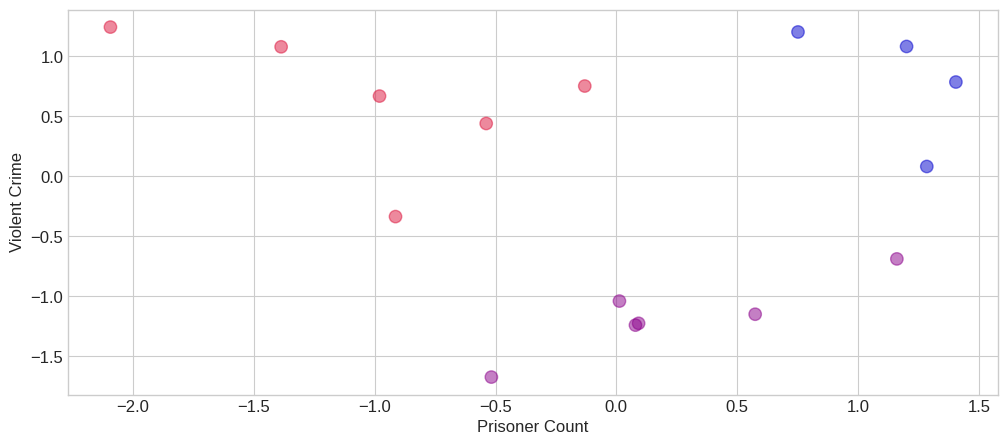

In [ ]:
import matplotlib.pylab as plt
from sklearn import cluster, datasets
from matplotlib.colors import ListedColormap

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))

def make_plot(df_year, axis):
    X = df_year

    K = 3
    clf = cluster.KMeans(init='random', n_clusters=K, n_init=10, max_iter=300, random_state=12)
    clf.fit(df_year)

    customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
    plt.scatter(df_year[:,0], df_year[:,1],  marker = 'o',
                c=clf.labels_,
                cmap = customcmap, s=80, alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Prisoner Count")
    plt.ylabel(axis)
    plt.show()

make_plot(scaled, "Violent Crime")

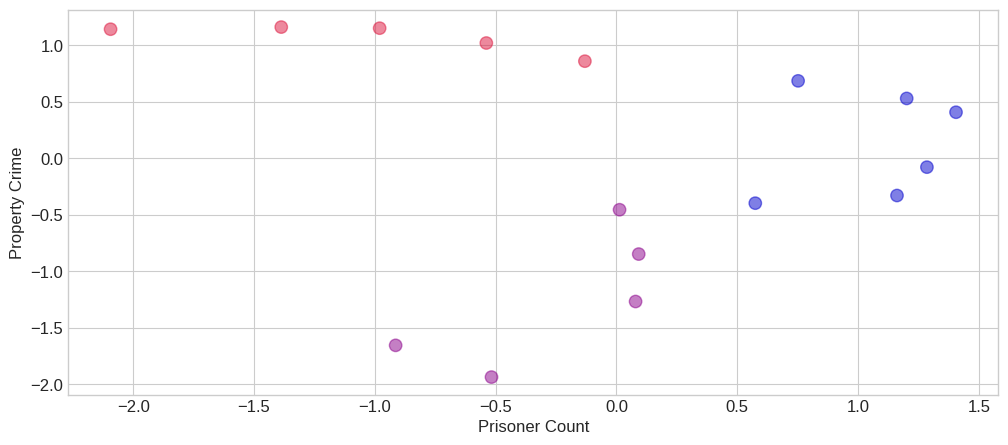

In [ ]:
temp = crime_df.copy(deep=True)

col = ['jurisdiction', 'year', 'prisoner_count', 'property_crime_total']
temp = temp[col]
temp = temp.drop(temp[temp['jurisdiction'] == 'FEDERAL'].index)

agg_functions = {'jurisdiction': 'first', 'prisoner_count': 'sum', 'property_crime_total': 'sum'}
df_property = temp.groupby(temp['year']).aggregate(agg_functions)

col = ['prisoner_count', 'property_crime_total']
df_property = df_property[col]
df_property = df_property.dropna(axis='rows', how='any')
scaled = scaler.fit_transform(df_property)

make_plot(scaled, "Property Crime")

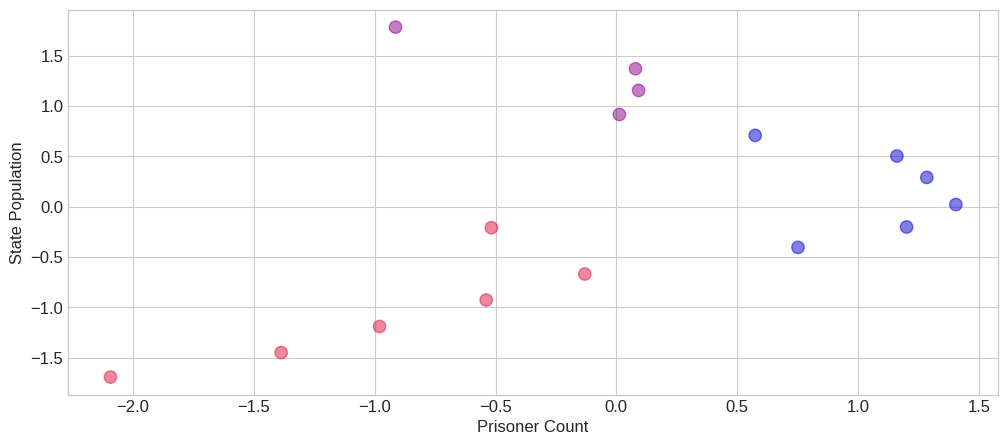

In [ ]:
temp = crime_df.copy(deep=True)

col = ['jurisdiction', 'year', 'prisoner_count', 'state_population']
temp = temp[col]
temp = temp.drop(temp[temp['jurisdiction'] == 'FEDERAL'].index)

agg_functions = {'jurisdiction': 'first', 'prisoner_count': 'sum', 'state_population': 'sum'}
df_population = temp.groupby(temp['year']).aggregate(agg_functions)

col = ['prisoner_count', 'state_population']
df_population = df_population[col]
df_population = df_population.dropna(axis='rows', how='any')
scaled = scaler.fit_transform(df_population)

make_plot(scaled, "State Population")

For each of the plots, the dots represent a year with the sum of every states' data. All three plots do not have clearly defined clusters as the data is quite scattered, which is due to the small sample size of 15 years. There are no clear outliers, but the red clusters seem to have points further from the rest.